In [126]:
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [127]:
from sklearn.datasets import load_iris
iris= load_iris()

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) #creating dataframe

x=iris.data
y=iris.target

In [128]:
kmeans=KMeans(n_clusters=3, random_state=0)
ypred=kmeans.fit_predict(x)

In [129]:
print(kmeans.cluster_centers_) #display cluster centers

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [130]:
s = metrics.silhouette_score(x, y)
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

Silhouette Coefficient for the Iris Dataset Clusters: 0.50


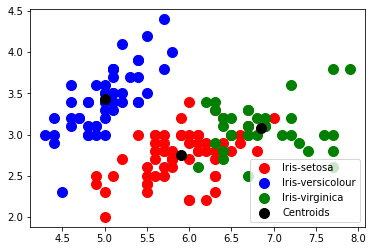

In [131]:
plt.scatter(x[ypred   == 0, 0], x[ypred == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[ypred   == 1, 0], x[ypred == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[ypred   == 2, 0], x[ypred == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [132]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris_df)
    distortions.append(kmeanModel.inertia_)

C:\Users\Intel\NEWANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


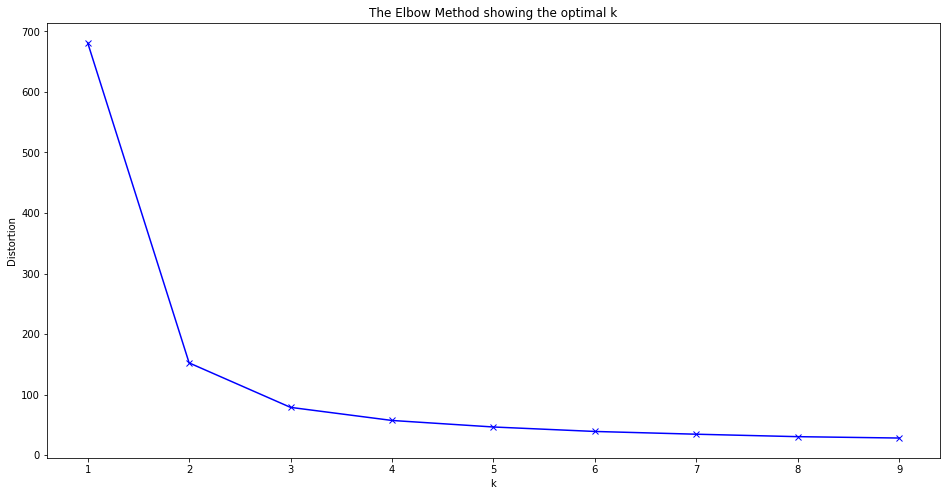

In [133]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [134]:
from sklearn.cluster import DBSCAN
import seaborn as sns
dbscan = DBSCAN(eps=0.5,min_samples=5)
ypred1 = dbscan.fit_predict(x)


In [135]:
labels = dbscan.labels_

In [136]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [137]:
n_clusters_ = len(set(labels)) -(1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [138]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 17


In [139]:
s = metrics.silhouette_score(x, dbscan.labels_)
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

Silhouette Coefficient for the Iris Dataset Clusters: 0.49


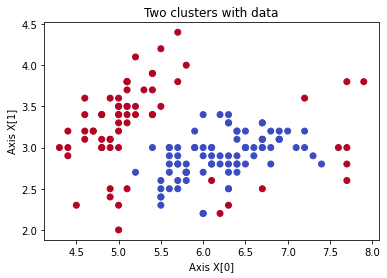

In [140]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(x[:,0], x[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

[0.         0.         0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.17320508 0.17320508 0.17320508 0.17320508 0.17320508 0.17320508
 0.17320508 0.17320508 0.2        0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.2
 0.2236068  0.2236068  0.2236068  0.2236068  0.2236068  0.2236068
 0.2236068  0.2236068  0.2236068  0.2236068  0.24494897 0.24494897
 0.24494897 0.24494897 0.24494897 0.24494897 0.24494897 0.24494897
 0.24494897 0.24494897 0.24494897 0.24494897 0.26457513 0.26457513
 0.26457513 0.26457513 0

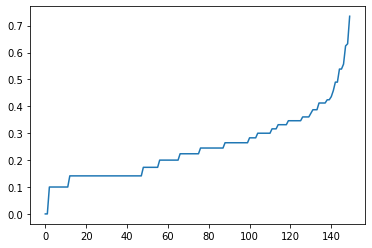

In [141]:
#knee method for optimal value of epsilon
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(x)
distances, indices = nearest_neighbors.kneighbors(x)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()

0.3741657386773941


<Figure size 360x360 with 0 Axes>

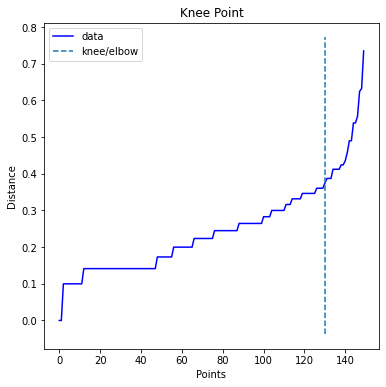

In [143]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 2
Estimated no. of noise points: 47
v_measure = 0.6044156375501386


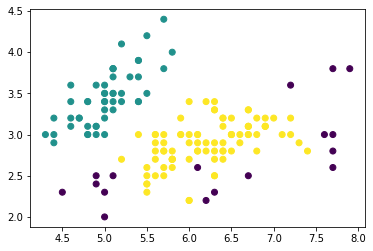

In [146]:
dbscan_cluster = DBSCAN(eps=0.374, min_samples=5)
dbscan_cluster.fit(x)

# Visualizing DBSCAN
plt.scatter(x[:, 0], 
x[:, 1], 
c=dbscan.labels_, 
label=y)


# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)
from sklearn.metrics import v_measure_score
# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))